In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_share=pd.read_csv('day.csv')
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Quality Check

In [3]:
#Checking for NULL values in the dataset
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
print('Before duplicate check', bike_share.shape)
bike_share.drop_duplicates(subset=None, inplace=True)
print('After duplicate check', bike_share.shape)

Before duplicate check (730, 16)
After duplicate check (730, 16)


##### Observation:
There is no NULL values or Duplicate values in the dataset


In [5]:
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Dropping columns `instant`, `dteday`,`casual`,`registered` from the dataset

In [6]:
bike_share_new=bike_share.drop(columns={'instant', 'dteday','casual','registered'},axis=1)

In [7]:
bike_share_new

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [8]:
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Converting the datatype of  `season`, `weathersit`,`mnth`,`weekday` to Categorical Variable

In [9]:
cat_vars=['season', 'weathersit','mnth','weekday']
bike_share_new[cat_vars]=bike_share_new[cat_vars].astype('category')

In [10]:
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [11]:
bike_share_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Creating Dummy Variables 
- Categorical variables to dummy variables

In [12]:
cat_vars_dummies=pd.get_dummies(bike_share_new[cat_vars],drop_first=True)

In [13]:
cat_vars_dummies=cat_vars_dummies.apply(lambda x: x.map({True:1, False:0}))

In [14]:
bike_share_new=pd.concat([bike_share_new,cat_vars_dummies],axis=1)

In [15]:
bike_share_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [16]:
bike_share_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        730 non-null    category
 1   yr            730 non-null    int64   
 2   mnth          730 non-null    category
 3   holiday       730 non-null    int64   
 4   weekday       730 non-null    category
 5   workingday    730 non-null    int64   
 6   weathersit    730 non-null    category
 7   temp          730 non-null    float64 
 8   atemp         730 non-null    float64 
 9   hum           730 non-null    float64 
 10  windspeed     730 non-null    float64 
 11  cnt           730 non-null    int64   
 12  season_2      730 non-null    int64   
 13  season_3      730 non-null    int64   
 14  season_4      730 non-null    int64   
 15  weathersit_2  730 non-null    int64   
 16  weathersit_3  730 non-null    int64   
 17  mnth_2        730 non-null    int64   
 18  mnth_3    

In [17]:
bike_share_new

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,...,0,0,0,1,0,0,0,1,0,0
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,...,0,0,0,1,0,0,0,0,1,0
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,...,0,0,0,1,0,0,0,0,0,1
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,0,0,1,0,0,0,0,0,0


### Splitting Into Train and Test

In [18]:
df_train,df_test=train_test_split(bike_share_new, train_size=0.7,random_state=100)
print('Train Set: ',df_train.shape)
print('Test Set', df_test.shape)

Train Set:  (510, 34)
Test Set (220, 34)


In [19]:
df_test.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

In [20]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [21]:
# Create a new dataframe of only numeric variables:

numerical_variables=['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_share_num=df_train[numerical_variables]

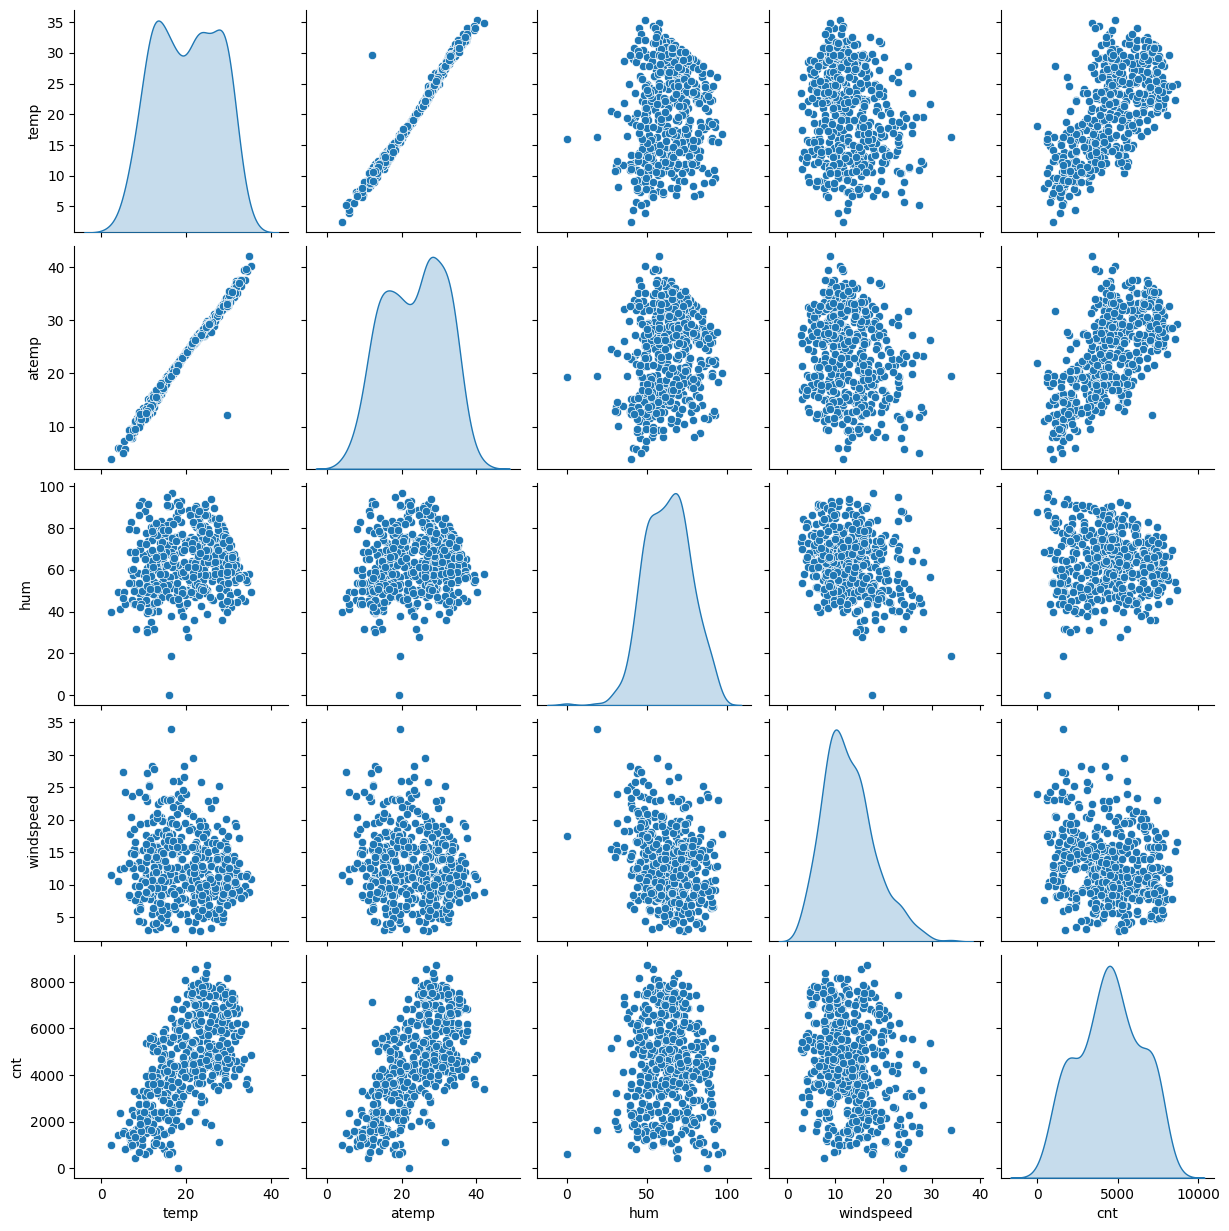

In [22]:
sns.pairplot(bike_share_num, diag_kind='kde')
plt.show()

### Observation
From the above plot, we can understand there is a linear relationship between `temp`,`atemp` and target variable `cnt`

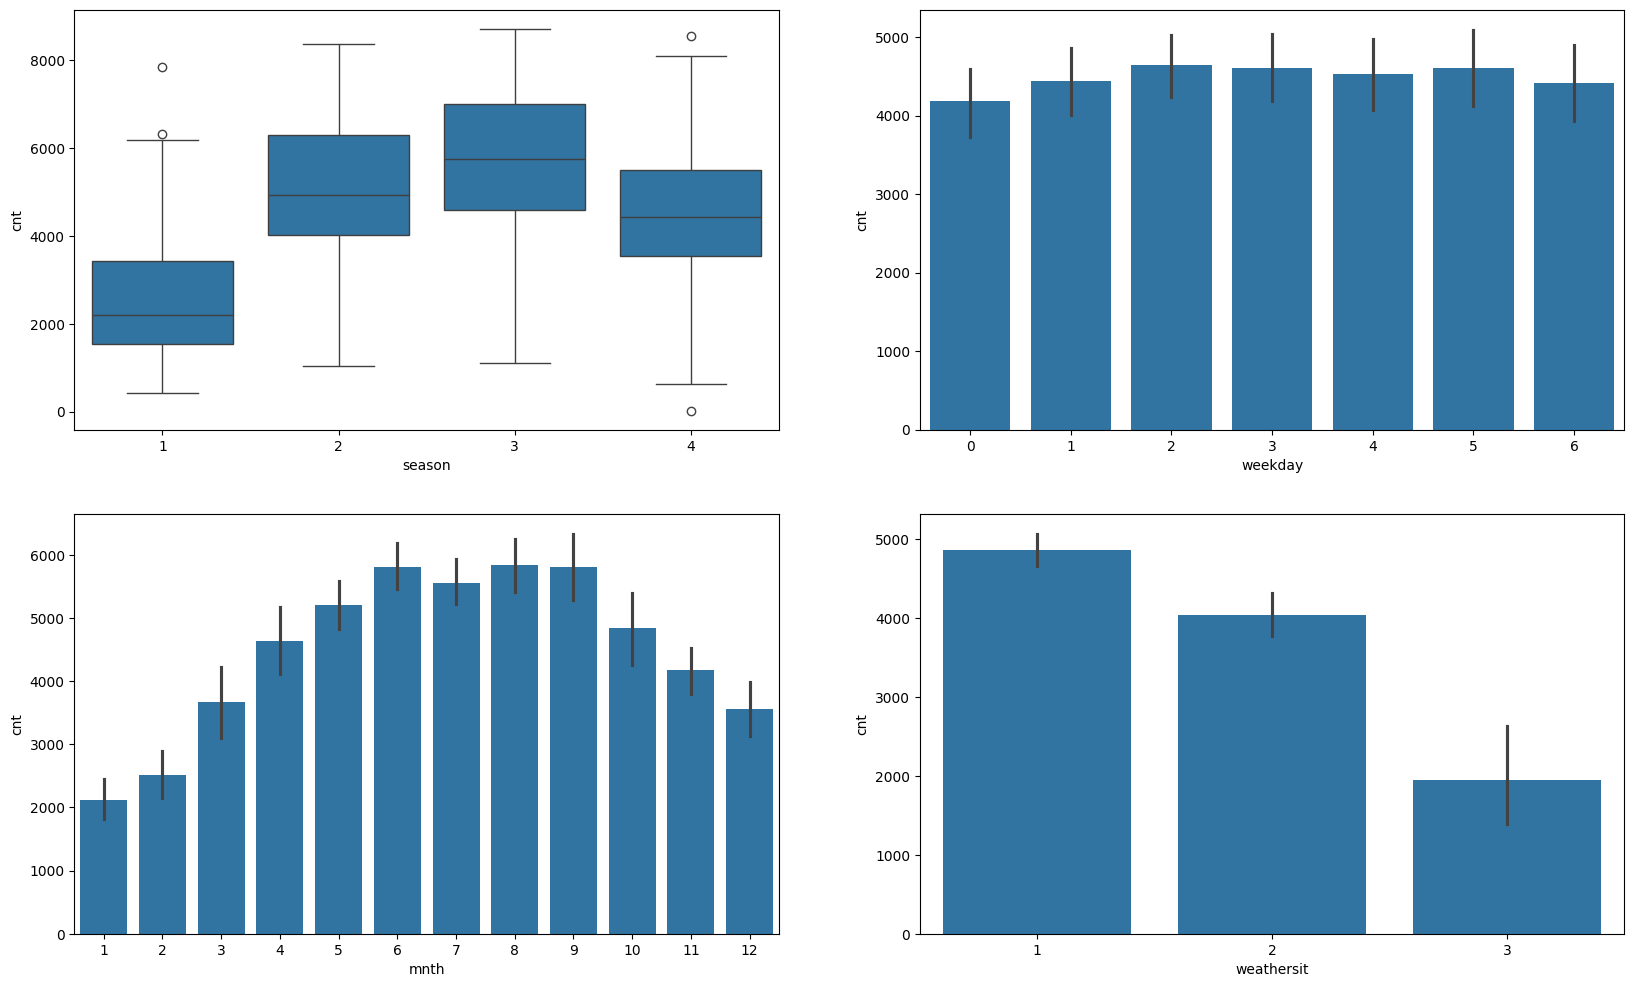

In [23]:
# Visualizing the categorical variable 
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt',data=df_train)

plt.subplot(2,2,2)
sns.barplot(x='weekday',y='cnt',data=df_train)

plt.subplot(2,2,3)
sns.barplot(x='mnth',y='cnt',data=df_train)

plt.subplot(2,2,4)
sns.barplot(x='weathersit',y='cnt',data=df_train)

plt.show()

## Observation
- <b>Season:</b> Most of the bookings are done in Season 2 (Summer) and Season 3 (Fall).
- <b>Month:</b> Most of the bookings are done Month 6 (June) ,7 (July),8 (August) and 9 (September)
- <b>Weekday:</b> Most of the bookings are done on all the days. No variation in the data 
- <b>Weathersit:</b> Most of the bookings are done at weathersit1 (Clear, Few clouds, Partly cloudy, Partly cloudy) and Weathersit2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)


In [24]:
df_train=df_train.drop(columns={'season','weathersit','mnth','weekday'},axis=1)

### Rescaling the Features

In [25]:
#Instantiate an Object
scaler=MinMaxScaler()
df_train[numerical_variables]=scaler.fit_transform(df_train[numerical_variables])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.080392,0.084314,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.272166,0.278131,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model

<Axes: >

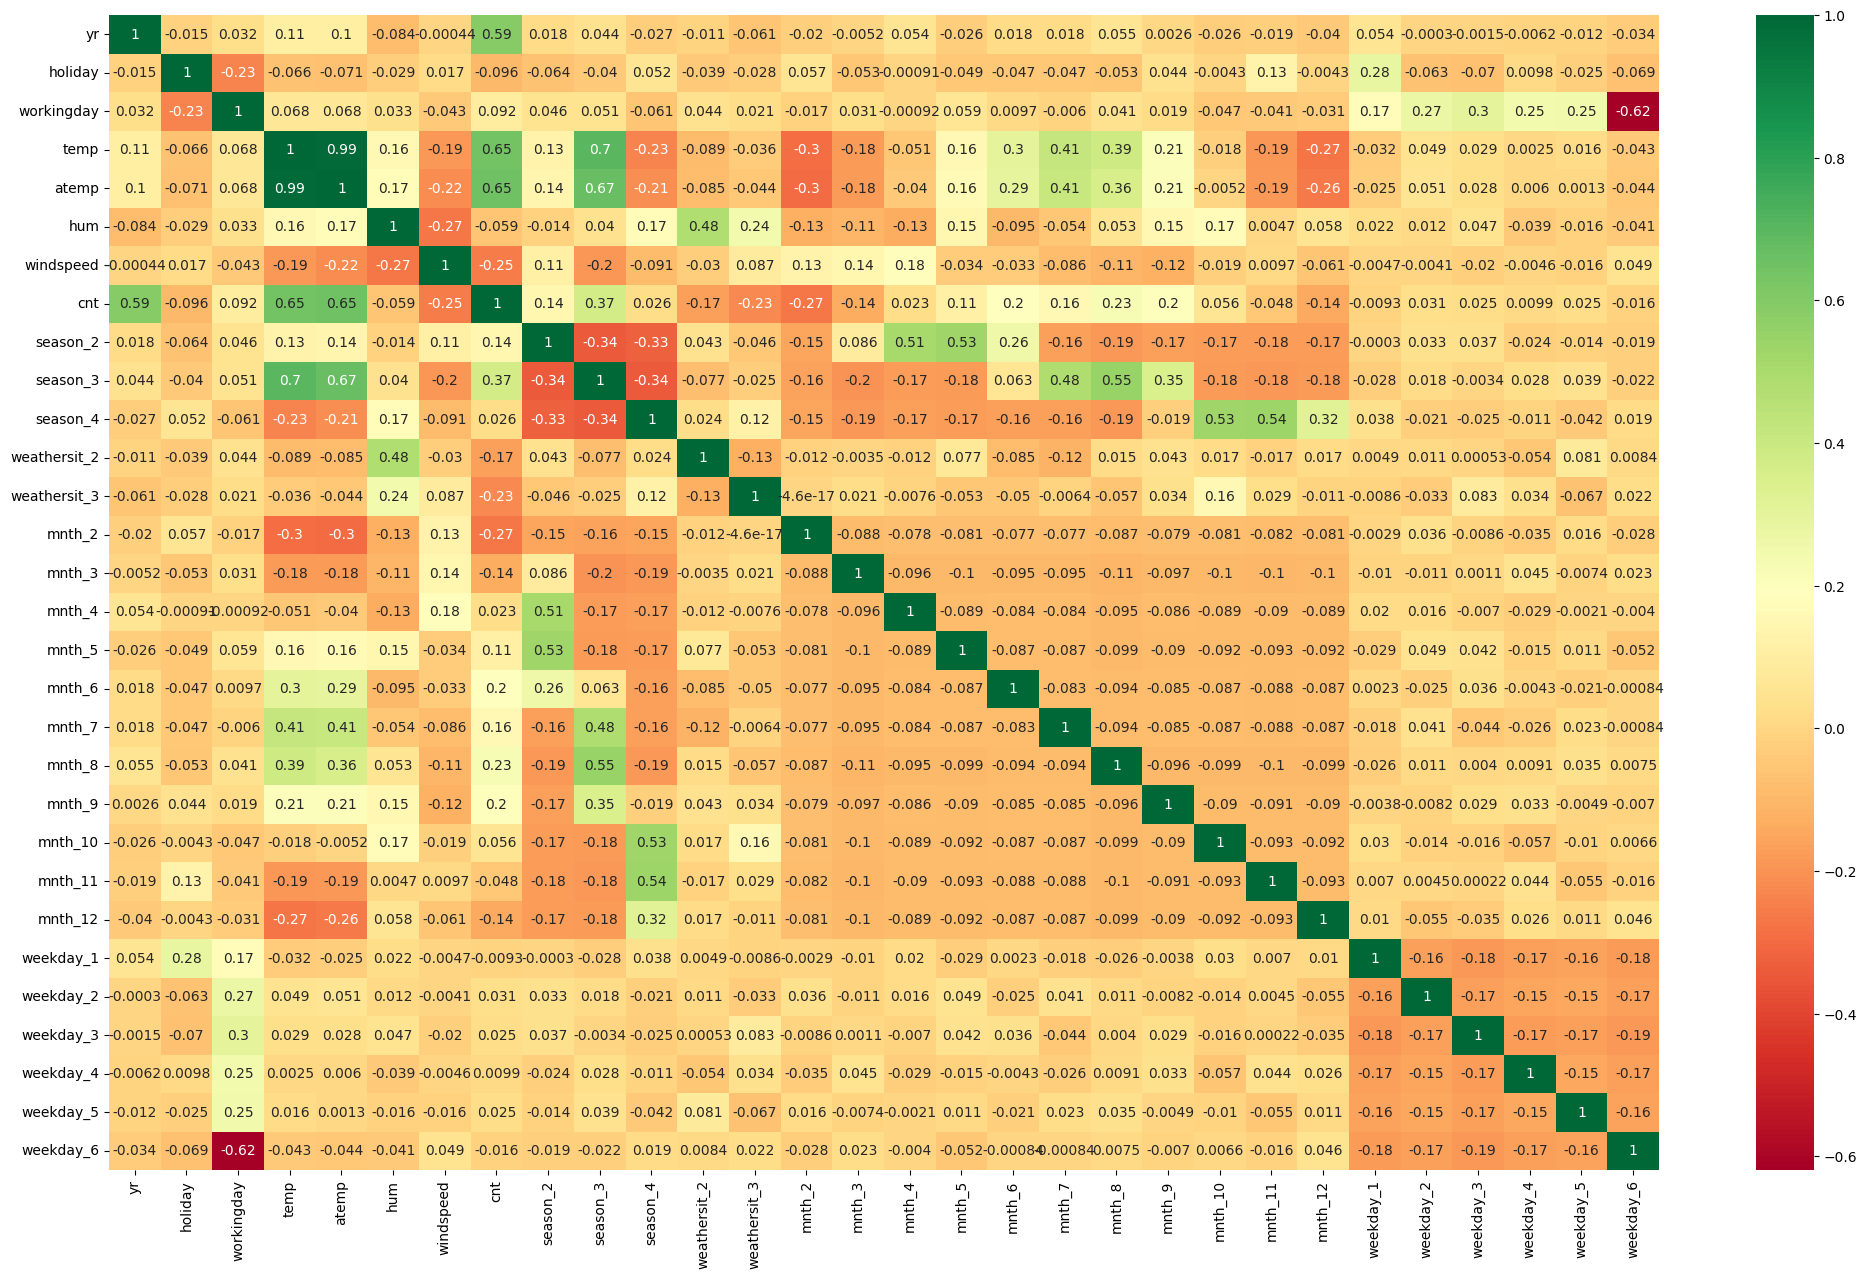

In [27]:
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')

### Observation
From the above figure, it clearly `yr`,`temp`,`atemp` are highly correlated with target variable `cnt`

### Dividing into X and Y sets for the model building

In [28]:
#X_train,Y_train
y_train = df_train.pop('cnt')
x_train = df_train

In [29]:
x_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Building a Linear Model
 we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [30]:
lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [31]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(estimator=lm, n_features_to_select=15)

In [32]:
rfe = rfe.fit(x_train, y_train)

In [33]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 14),
 ('mnth_3', False, 15),
 ('mnth_4', False, 13),
 ('mnth_5', False, 9),
 ('mnth_6', False, 12),
 ('mnth_7', False, 2),
 ('mnth_8', False, 8),
 ('mnth_9', True, 1),
 ('mnth_10', False, 7),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5)]

In [34]:
cols = x_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'weathersit_3', 'mnth_9', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [35]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[cols]

In [36]:
x_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,weathersit_3,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,1,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,0,0,0
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,0,1,0,0,0,0


In [37]:
# Adding a constant variable 
x_train_rfe = sm.add_constant(x_train_rfe)
# Running the linear model
lm = sm.OLS(y_train,x_train_rfe).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.91e-181
Time:                        16:41:36   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

In [38]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
11,weekday_1,inf
12,weekday_2,inf
13,weekday_3,inf
14,weekday_4,inf
15,weekday_5,inf
0,const,42.45
5,hum,1.26
8,season_4,1.25


### Observation
VIF is infinity for some variables, it typically means that these variables are very highly correlated and their R^2 value is 1. This causes Multi-colinearity. To eliminate the multi colinearity we need to remove the variables with Infinity or HIGH VIF one by one. So feature with VIF > 5 should be eliminated from the model. I will be doing that in further iterations as shown below

## Model 2


In [39]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.91e-181
Time:                        16:41:36   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

<b> Removing the variable `weekday_5` based on its High p-value & Infinity VIF </b>

In [40]:
x_train_rfe=x_train_rfe.drop('weekday_5',axis=1)

In [41]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.91e-181
Time:                        16:41:37   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

In [42]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.45
3,workingday,2.47
11,weekday_1,1.94
13,weekday_3,1.91
14,weekday_4,1.79
12,weekday_2,1.77
2,holiday,1.35
5,hum,1.26
8,season_4,1.25
4,temp,1.21


<b> Removing the variable `workingday` based on its High p-value </b>

In [43]:
x_train_rfe=x_train_rfe.drop('workingday',axis=1)

In [44]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.16e-181
Time:                        16:41:37   Log-Likelihood:                 491.66
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     496   BIC:                            -896.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2638      0.027      9.893   

In [45]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.41
4,hum,1.26
7,season_4,1.25
10,weekday_1,1.25
3,temp,1.21
6,season_2,1.19
12,weekday_3,1.17
5,windspeed,1.16
13,weekday_4,1.15
11,weekday_2,1.14


<b> Removing the variable `holiday` based on its High p-value </b>

In [46]:
x_train_rfe=x_train_rfe.drop('holiday',axis=1)

In [47]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.41e-180
Time:                        16:41:37   Log-Likelihood:                 486.33
No. Observations:                 510   AIC:                            -946.7
Df Residuals:                     497   BIC:                            -891.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2602      0.027      9.676   

In [48]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.34
3,hum,1.25
6,season_4,1.24
2,temp,1.21
5,season_2,1.19
11,weekday_3,1.17
4,windspeed,1.16
9,weekday_1,1.16
12,weekday_4,1.15
10,weekday_2,1.14


<b> Removing the variable `weekday_1` based on its High p-value </b>

In [49]:
x_train_rfe=x_train_rfe.drop('weekday_1',axis=1)

In [50]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())


vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.43e-181
Time:                        16:41:37   Log-Likelihood:                 485.90
No. Observations:                 510   AIC:                            -947.8
Df Residuals:                     498   BIC:                            -897.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2577      0.027      9.634   

<b> Removing the variable `weekday_2` based on its High p-value </b>

In [51]:
x_train_rfe=x_train_rfe.drop('weekday_2',axis=1)

In [52]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())


vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          9.53e-183
Time:                        16:41:37   Log-Likelihood:                 485.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     499   BIC:                            -903.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2583      0.027      9.682   

<b> Removing the variable `weekday_4` based on its High p-value </b>

In [53]:
x_train_rfe=x_train_rfe.drop('weekday_4',axis=1)

In [54]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())


vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.30e-184
Time:                        16:41:37   Log-Likelihood:                 485.45
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     500   BIC:                            -908.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2611      0.026      9.862   

<b> Removing the variable `hum` based on its High p-value </b>

In [55]:
x_train_rfe=x_train_rfe.drop('hum',axis=1)

In [56]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())


vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     251.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.66e-170
Time:                        16:41:37   Log-Likelihood:                 450.00
No. Observations:                 510   AIC:                            -882.0
Df Residuals:                     501   BIC:                            -843.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0819      0.018      4.651   

<b> Removing the variable `weekday_3` based on its High p-value </b>

In [57]:
x_train_rfe=x_train_rfe.drop('weekday_3',axis=1)

In [58]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())


vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.34e-171
Time:                        16:41:37   Log-Likelihood:                 449.48
No. Observations:                 510   AIC:                            -883.0
Df Residuals:                     502   BIC:                            -849.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0839      0.018      4.790   

<b> Removing the variable `const` based on its High VIF </b>

In [59]:
x_train_rfe=x_train_rfe.drop('const',axis=1)

In [60]:
x_train_sm=sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)

#fit
lr_model =lr.fit()

lr_model.params
print(lr_model.summary())


vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.34e-171
Time:                        16:41:38   Log-Likelihood:                 449.48
No. Observations:                 510   AIC:                            -883.0
Df Residuals:                     502   BIC:                            -849.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0839      0.018      4.790   

In [61]:
lr_model.params

const           0.083854
yr              0.233690
temp            0.571918
windspeed      -0.147367
season_2        0.082444
season_4        0.125072
weathersit_3   -0.250231
mnth_9          0.086771
dtype: float64

## Residual Analysis of the train data

In [62]:
y_train_pred=lr_model.predict(x_train_sm)

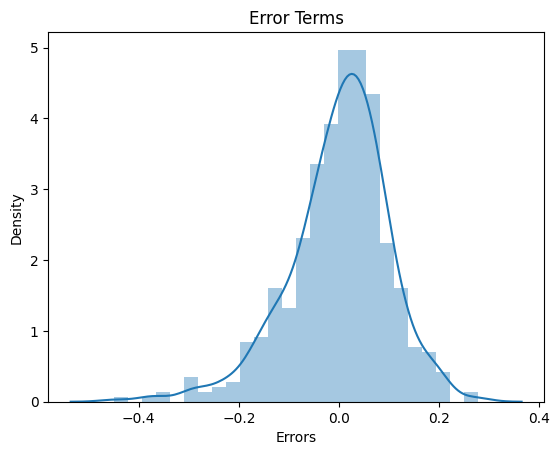

In [63]:
#Normal Distribution check
res =y_train-y_train_pred
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

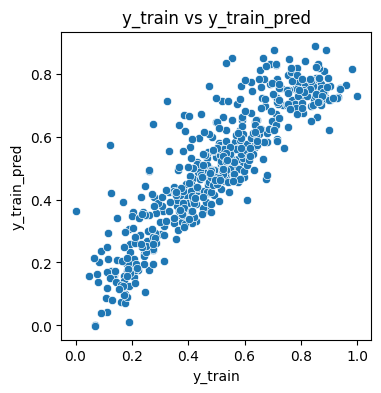

In [81]:
#Linearity check
plt.figure(figsize=(4,4))
sns.scatterplot(x=y_train,y=y_train_pred)
plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

Text(0, 0.5, 'Predicted Values')

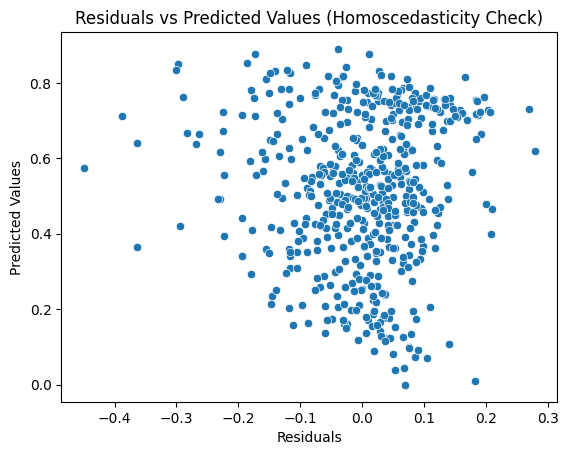

In [83]:

#Homoscedasticity Check
sns.scatterplot(x=res,y=y_train_pred)
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')


#### Observation:
 - Residuals are normally distributed. Hence assumption for Linear Regression is valid.
 - Relationship between target variable and Predictors are linear . Hence assumption for linear regression is valid
 - In the Residuals vs Predicted values graph, there is no trends or patterns so it shows homoscedasticity. Hence assumption for linear regression is valid

## Making Predictions Using the Final Model

In [66]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

In [67]:
y_test=df_test.pop('cnt')
x_test=df_test

In [68]:
x_test_sm=sm.add_constant(x_test)

In [69]:
x_test_sm=x_test_sm[x_train_sm.columns]

In [70]:
y_test_pred=lr_model.predict(x_test_sm)

## Model Evaluation

Text(0.5, 1.0, 'y_test vs y_pred')

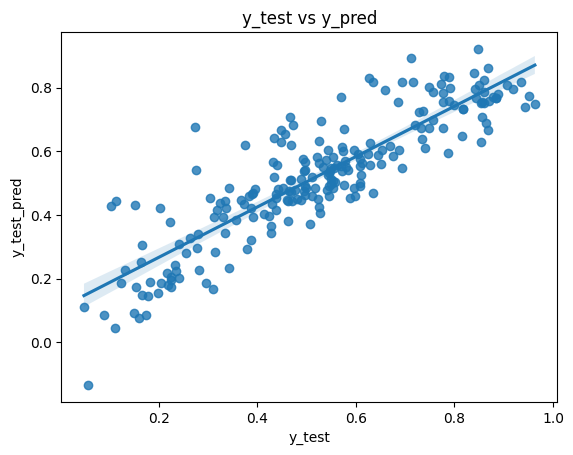

In [71]:
sns.regplot(x=y_test,y=y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('y_test vs y_pred') 

In [72]:
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7676656302707386


In [73]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.8001371459117146


In [74]:
# n is number of rows in X
r2=r2_score(y_true=y_train, y_pred=y_train_pred)
n = x_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7646776072831478

# FINAL REPORT

The equation of our best fitted line is: 


$ cnt =0.083854+0.233690  \times (yr) +0.571918 \times (temp) - 0.147367 \times (windspeed) + 0.082444 \times (season_2) +0.125072 \times (season_4)-0.250231 \times (weathersit_3) + 0.086771 \times (mnth_9) $

As per our final Model, the top 3 predictor variables that influences the bike booking are:

- **Temperature (temp)** - A coefficient value of ‘0.571918’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.571918 units.
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.250231’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by -0.250231 units.
- **Year (yr)** - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.233690 units.

## Final Result
**Train ${R}^2$:**  0.800

**Train Adjusted ${R}^2$:**  0.797

**Test ${R}^2$:**  0.767

**Test Adjusted ${R}^2$:**  0.764

This seems to be Good model which explains 80% of the variance in Training dataset and explains 76.7% of the variance in Test dataset